# **CodeWaveMarine** Team





Beranggotakan:

1.   Aditya Yudha Pratama
2.   Johan Jeques Junior
3. Muhammad Rizki Fachriza Bailey

Dari Perguruan Tinggi **Universitas Maritim Raja Ali Haji**



## Menghubungkan Direktori Cloud Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Preprocessing Data**

Menggunakan
1. Resize dengan cv2
2. Augmentasi Data menggunakan Kfold Cross Validation generator

## Resize

Menggunakan cv2 untuk meresize foto menjadi ukuran 128x128 px.

cv2 atau OpenCV (Open Source Computer Vision Library) adalah sebuah library atau pustaka perangkat lunak open source yang digunakan untuk memproses gambar dan video

In [ ]:
import cv2
import os

In [ ]:
# Path direktori dataset
dataset_path =  '/content/drive/MyDrive/ML IFest 3.0 UMDP/Percobaan/Preprocessing Data/preprocessing_dataset_manual/jenis_pempek'

In [ ]:
# Dapatkan daftar semua file dan direktori
path = '/content/drive/MyDrive/ML IFest 3.0 UMDP/Percobaan/Preprocessing Data/preprocessing_dataset_manual/jenis_pempek'
dir_list = os.listdir(path)

print("Folder yang ada didalam '", path, "' :")

# print list direktori, biar bisa liat isi didalamnya
print(dir_list)

Folder yang ada didalam ' /content/drive/MyDrive/ML IFest 3.0 UMDP/Percobaan/Preprocessing Data/preprocessing_dataset_manual/jenis_pempek ' :
['telur', 'pastel', 'lenjer', 'keriting', 'adaan']


In [ ]:
# List folder label dalam dataset

labels = os.listdir(dataset_path)

In [ ]:
# Membuat direktori baru untuk menyimpan gambar yang telah diresize
preprocessed_dataset = '/content/drive/MyDrive/ML IFest 3.0 UMDP/Percobaan/Preprocessing Data/salinanBP'
if not os.path.exists(preprocessed_dataset):
    os.makedirs(preprocessed_dataset)

In [ ]:
# Looping setiap folder label dalam dataset
for label in labels:
    # Membuat path direktori untuk setiap label
    label_path = os.path.join(dataset_path, label)

    # Membuat direktori baru untuk menyimpan hasil resize
    new_label_path = os.path.join(preprocessed_dataset, label)
    if not os.path.exists(new_label_path):
        os.makedirs(new_label_path)

    # Looping setiap gambar dalam label
    for filename in os.listdir(label_path):
        # Membuat path file gambar
        img_path = os.path.join(label_path, filename)

        # Mengecek apakah file sudah diresize
        new_img_path = os.path.join(new_label_path, filename)
        if os.path.exists(new_img_path):
            continue

        # Membaca gambar
        img = cv2.imread(img_path)

        # Resize gambar
        resized_img = cv2.resize(img, (128, 128))

        # Menyimpan gambar yang telah diresize ke direktori baru
        cv2.imwrite(new_img_path, resized_img)

## Pembagian Data

In [ ]:
pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import splitfolders

In [ ]:
dataset_folder="salinanBP"
train_folder = "train"
val_folder = "val"
test_folder = "test"

# Membagi dataset menjadi 80% untuk train, 10% untuk validation, 10% untuk test jika folder train, val, test belum ada
if not all(os.path.exists(folder) for folder in [train_folder, val_folder, test_folder]):
    splitfolders.ratio(
        preprocessed_dataset,
        output=f"/content/drive/MyDrive/ML IFest 3.0 UMDP/Percobaan/Dataset Split/{dataset_folder}",
        seed=1337,
        ratio=(.8, .1, .1)
        )
    print("\nSudah selesai dibagi")

Copying files: 485 files [01:05,  7.38 files/s]


In [ ]:
# Definisikan direktori train, validation, dan test
train_dir = "/content/drive/MyDrive/ML IFest 3.0 UMDP/Percobaan/Dataset Split/salinanBP/train"
val_dir = "/content/drive/MyDrive/ML IFest 3.0 UMDP/Percobaan/Dataset Split/salinanBP/val"
test_dir = "/content/drive/MyDrive/ML IFest 3.0 UMDP/Percobaan/Dataset Split/salinanBP/test"

In [ ]:
# Menghitung jumlah gambar dalam setiap folder train dan validation

  # Hitung yang ada pada train_dir
print ("Folder yang ada pada Direktori Train:\n", os.listdir(train_dir))
train_len = sum([len(os.listdir(os.path.join(train_dir, i))) for i in os.listdir(train_dir)])
print("Semua total gambar yang ada di direktori Train =", train_len, "gambar")
print("\n")

# Hitung yang ada pada val_dir
print ("Folder yang ada pada Direktori Validation:\n", os.listdir(val_dir))
val_len = sum([len(os.listdir(os.path.join(val_dir, i))) for i in os.listdir(val_dir)])
print("Semua total gambar yang ada di direktori Validation =", val_len, "gambar")
print("\n")

# Hitung yang ada pada test_dir
print ("Folder yang ada pada Direktori Testing:\n", os.listdir(test_dir))
test_len = sum([len(os.listdir(os.path.join(test_dir, i))) for i in os.listdir(test_dir)])
print("Semua total gambar yang ada di direktori Testing =", val_len, "gambar")

Folder yang ada pada Direktori Train:
 ['telur', 'pastel', 'lenjer', 'keriting', 'adaan']
Semua total gambar yang ada di direktori Train = 386 gambar


Folder yang ada pada Direktori Validation:
 ['telur', 'pastel', 'lenjer', 'keriting', 'adaan']
Semua total gambar yang ada di direktori Validation = 46 gambar


Folder yang ada pada Direktori Testing:
 ['telur', 'pastel', 'lenjer', 'keriting', 'adaan']
Semua total gambar yang ada di direktori Testing = 46 gambar


## K-Fold Cross Validation dan Augmentasi Data

K-fold Cross Validation merupakan salah satu teknik validasi model pada machine learning yang digunakan untuk mengukur kinerja model secara objektif.  Dengan menggunakan teknik ini, setiap data pada dataset akan dipakai untuk training dan validasi secara bergantian, sehingga dapat menghasilkan kinerja model yang lebih akurat dan dapat dipercaya.

In [ ]:
# Menggunakan K-Fold Cross Validation
# Impor scikit-learn
import sklearn
print("Scikit-Learn ini versi:", sklearn.__version__)
# Impor K-Fold untuk menggunakan Cross Validation
from sklearn.model_selection import KFold

Scikit-Learn ini versi: 1.2.2


In [ ]:
# Tentukan lipatan K-Fold
kfold = KFold(n_splits=5, shuffle=True, random_state=1337)

In [ ]:
# Impor ImageDataGenerator untuk data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   horizontal_flip=True,
                                   shear_range=0.2,
                                   fill_mode='nearest')
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# Membuat generator baru dari data test_dir
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(128, 128),
                                                  batch_size=32,
                                                  class_mode='categorical')

Found 53 images belonging to 5 classes.


In [ ]:
for i, (train_index, val_index) in enumerate(kfold.split(train_dir)):
    print(f"Lipatan ke-{i+1}")

# Membuat generator baru untuk setiap lipatan

    # Membuat generator baru dari data train_dir
    train_generator = train_datagen.flow_from_directory(train_dir, # lokasi folder dataset
                                                    target_size=(128, 128), # ukuran yang diinginkan
                                                    batch_size=32,
                                                    class_mode='categorical')
    # Membuat generator baru dari data train_dir
    val_generator = val_datagen.flow_from_directory(val_dir,
                                                    target_size=(128, 128),
                                                    batch_size=32,
                                                    class_mode='categorical')

Lipatan ke-1
Found 386 images belonging to 5 classes.
Found 46 images belonging to 5 classes.
Lipatan ke-2
Found 386 images belonging to 5 classes.
Found 46 images belonging to 5 classes.
Lipatan ke-3
Found 386 images belonging to 5 classes.
Found 46 images belonging to 5 classes.
Lipatan ke-4
Found 386 images belonging to 5 classes.
Found 46 images belonging to 5 classes.
Lipatan ke-5
Found 386 images belonging to 5 classes.
Found 46 images belonging to 5 classes.


In [ ]:
# Hitung berapa jumlah steps_per_epoch dan validation_steps
print("--------------------------------------------------")
print("Model Augmentation telah melakukan lipatan")
print("--------------------------------------------------")
# Steps_per_epoch untuk membatasi jumlah batch data yang digunakan untuk melatih model dalam setiap epoch
batch_size = 32
steps_per_epoch = train_len // batch_size
steps_per_epoch = int(steps_per_epoch)
print("jumlah steps_per_epoch ialah: ", steps_per_epoch)

# Validation_steps untuk membatasi jumlah batch data yang digunakan untuk mengevaluasi akurasi model pada data validasi dalam setiap epoch
validation_steps = val_len // batch_size
validation_steps = int(validation_steps)
print ("jumlah validation_steps ialah: ", validation_steps)

--------------------------------------------------
Model Augmentation telah melakukan lipatan
--------------------------------------------------
jumlah steps_per_epoch ialah:  12
jumlah validation_steps ialah:  1


# **Membuat Model Machine Learning**

Menggunakan
1. Model Xception
2. Arsitektur CNN

## Model Xception

Xception didasarkan pada arsitektur Convolutional Neural Network (CNN) dan menggunakan konsep separable depthwise convolution untuk mengurangi jumlah parameter dalam model dan mempercepat proses pelatihan.

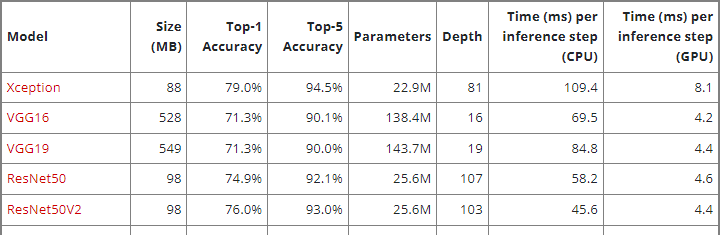

Bisa dilihat model Xception dan perbandingan lainnya di [tautan ini](https://keras.io/api/applications/)

In [ ]:
# Impor TensorFlow
import tensorflow as tf
print("TensorFlow ini versi:", tf.__version__)

TensorFlow ini versi: 2.11.0


In [ ]:
from tensorflow.keras.layers import Input

# **Arsitektur CNN**

CNN (Convolutional Neural Network) adalah salah satu jenis arsitektur jaringan saraf tiruan yang sering digunakan untuk memproses data gambar. CNN menggunakan operasi konvolusi untuk mengekstrak fitur dari gambar dan kemudian mempelajari hubungan antara fitur-fitur tersebut untuk melakukan klasifikasi.

CNN merupakan pilihan yang tepat untuk klasifikasi gambar jenis makanan Pempek karena CNN mampu menangkap fitur-fitur khusus pada gambar yang spesifik untuk jenis makanan Pempek, seperti tekstur kulit, bentuk, dan ukuran. Selain itu, dengan menggunakan teknik transfer learning, kita dapat memanfaatkan model-model yang sudah terbukti berhasil dalam memproses gambar untuk meningkatkan performa klasifikasi pada dataset gambar jenis makanan Pempek.

In [ ]:
base_model=tf.keras.applications.Xception(include_top=False, weights="imagenet",input_tensor=Input(shape=(128,128,3)))
base_model.trainable = False

layers = tf.keras.layers

model = tf.keras.Sequential([
    base_model,
    # Layer pertama (Convolutional Layer)
    layers.Conv2D(filters=32, padding='same', kernel_size=3, activation='relu', strides=1),
    layers.MaxPooling2D(2, 2),
    # Layer kedua (Convolutional Layer)
    layers.Conv2D(filters=64, padding='same', kernel_size=3, activation='relu', strides=1),
    layers.MaxPooling2D(2, 2),
    # Layer ketiga (Convolutional Layer)
    layers.Conv2D(filters=128, padding='same', kernel_size=3, activation='relu', strides=1),
    # Dropout Layer
    layers.Dropout(0.5),
    # Menambahkan layer flatten
    layers.Flatten(),
    # Layer keempat (Dense Layer)
    layers.Dense(units=256, activation='relu'),
    layers.Dropout(0.5),
    # Layer terakhir (Output Layer)
    layers.Dense(units=5, activation='softmax')
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 4, 4, 2048)        20861480  
                                                                 
 conv2d_21 (Conv2D)          (None, 4, 4, 32)          589856    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 2, 2, 32)         0         
 2D)                                                             
                                                                 
 conv2d_22 (Conv2D)          (None, 2, 2, 64)          18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 1, 1, 64)         0         
 2D)                                                             
                                                                 
 conv2d_23 (Conv2D)          (None, 1, 1, 128)        

In [ ]:
# Ini adalah langkah compile model dengan menentukan loss function, optimizer, dan metric yang digunakan untuk melatih model
model.compile(loss='categorical_crossentropy', # merupakan loss function yang umum digunakan untuk klasifikasi multi-kelas.
              optimizer=tf.keras.optimizers.Adam(learning_rate=.001), # optimizer yang populer dan efektif untuk deep learning
              metrics=['accuracy']) # untuk menilai kinerja model adalah accuracy

**Optimizer Adam** adalah algoritma optimisasi stokastik yang digunakan untuk mengoptimalkan fungsi biaya pada model deep learning. Adam mengkombinasikan algoritma RMSprop dan algoritma momentum untuk menghitung gradien dari fungsi biaya secara efisien.

Alasan untuk menggunakan **learning_rate=.001** adalah karena learning rate ini umumnya dianggap sebagai nilai yang cocok untuk banyak kasus penggunaan dan memungkinkan model untuk mengkonvergensi dengan baik. Selain itu, optimizer Adam juga terbukti efektif dalam mengoptimalkan model deep learning pada berbagai tugas klasifikasi gambar, termasuk klasifikasi jenis makanan seperti pempek.

## Latih Model

In [ ]:
from keras.callbacks import EarlyStopping,ModelCheckpoint

# Buat direktori menyimpan model ML
checkpoint_dir = '/content/drive/MyDrive/ML IFest 3.0 UMDP/Percobaan/Model ML'
if not os.path.exists(checkpoint_dir):
    os.makedirs(checkpoint_dir)

# Buat objek model checkpoint untuk menyimpan model terbaik selama pelatihan
mc = ModelCheckpoint(
    '/content/drive/MyDrive/ML IFest 3.0 UMDP/Percobaan/Model ML/best_model.h5',
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

# Buat objek early stopping untuk menghentikan pelatihan saat tidak ada peningkatan dalam validasi
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    mode='min',
    restore_best_weights=True,
    verbose=2)

Model **Checkpoint** adalah sebuah fitur pada Keras yang memungkinkan pengguna untuk menyimpan model yang memiliki performa terbaik selama proses training. Hal ini dapat mempermudah pengguna dalam mengambil model terbaik dan menghindari overfitting pada data training.

**Early stopping** adalah teknik dalam deep learning untuk menghentikan proses pelatihan model saat performa tidak lagi meningkat di setiap epoch. Hal ini dilakukan untuk menghindari overfitting dan mempercepat proses pelatihan.

In [ ]:
history = model.fit(train_generator,
                    steps_per_epoch=steps_per_epoch,  # berapa batch yang akan dieksekusi pada setiap epoch
                    epochs=25, # jumlah total epoch yang akan dilakukan
                    validation_data=val_generator, # menampilkan akurasi pengujian data validasi
                    validation_steps=validation_steps,  # berapa batch yang akan dieksekusi pada setiap epoch
                    callbacks=[early_stopping, mc]) # panggil callback

Epoch 1/25
12/12 [==============================] - 10s 524ms/step - loss: 1.5941 - accuracy: 0.2938 - val_loss: 1.2386 - val_accuracy: 0.6250
Epoch 2/25
12/12 [==============================] - 3s 261ms/step - loss: 1.1568 - accuracy: 0.5226 - val_loss: 0.7478 - val_accuracy: 0.7500
Epoch 3/25
12/12 [==============================] - 4s 296ms/step - loss: 0.7946 - accuracy: 0.6823 - val_loss: 0.4273 - val_accuracy: 0.8438
Epoch 4/25
12/12 [==============================] - 3s 270ms/step - loss: 0.5443 - accuracy: 0.7994 - val_loss: 0.3809 - val_accuracy: 0.9062
Epoch 5/25
12/12 [==============================] - 3s 218ms/step - loss: 0.4560 - accuracy: 0.8446 - val_loss: 0.3520 - val_accuracy: 0.9062
Epoch 6/25
12/12 [==============================] - 3s 252ms/step - loss: 0.3175 - accuracy: 0.9068 - val_loss: 0.2181 - val_accuracy: 0.9375
Epoch 7/25
12/12 [==============================] - 2s 202ms/step - loss: 0.2558 - accuracy: 0.9209 - val_loss: 0.3534 - val_accuracy: 0.8750
Epoch

## Evaluasi Latih

Evaluasi ini penting dilakukan untuk menentukan apakah model memerlukan tuning atau modifikasi tertentu untuk meningkatkan performa pada data testing.

In [ ]:
import matplotlib.pyplot as plt

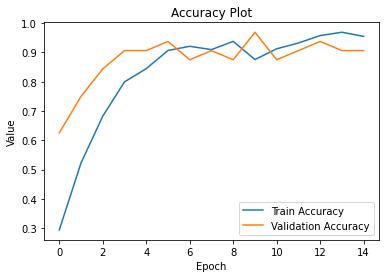

In [ ]:
# Visualisasi Grafik Akurasi pada Latih dan Validasi
plt.plot(history.history['accuracy'], label = 'Train Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Accuracy Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

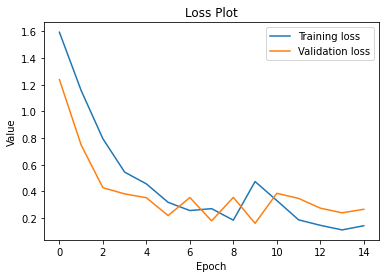

In [ ]:
# Visualisasi Grafik Loss pada Latih dan Validasi
plt.plot(history.history['loss'], label ='Training loss')
plt.plot(history.history['val_loss'], label = 'Validation loss')
plt.title('Loss Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

In [ ]:
# Tampilkan skor performa
print('Train Accuracy:', history.history['accuracy'][-1] * 100)
print('Train Loss:', history.history['loss'][-1] * 100)
print('Validation Accuracy:', history.history['val_accuracy'][-1] * 100)
print('Validation Loss:', history.history['val_loss'][-1] * 100)

Train Accuracy: 95.48022747039795
Train Loss: 14.18827474117279
Validation Accuracy: 90.625
Validation Loss: 26.527097821235657


In [ ]:
# Evaluasi model pada dataset test
scores = model.evaluate(test_generator)

# Menampilkan nilai loss dan akurasi pada dataset test
print(f'Test loss: {scores[0]*100}')
print(f'Test accuracy: {scores[1]*100}')

2/2 [==============================] - 0s 56ms/step - loss: 0.2631 - accuracy: 0.9434
Test loss: 26.314803957939148
Test accuracy: 94.33962106704712


## Menampilkan Skor Performa

Tahap akhir dari proses pelatihan model di mana dilakukan evaluasi kinerja model pada data testing. Oleh karena itu, menampilkan skor performa sangat penting dalam proses pengembangan model untuk memastikan model dapat memberikan hasil yang baik pada data baru yang belum pernah dilihat sebelumnya.

2/2 [==============================] - 1s 46ms/step


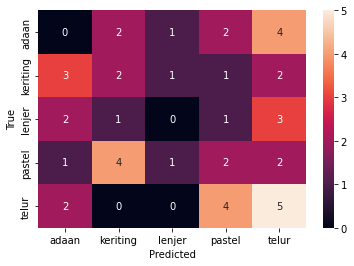

Confusion Matrix:
[[0 2 1 2 4]
 [3 2 1 1 2]
 [2 1 0 1 3]
 [1 4 1 2 2]
 [2 0 0 4 5]]

Classification Report:
              precision    recall  f1-score   support

       adaan       0.00      0.00      0.00         9
    keriting       0.22      0.22      0.22         9
      lenjer       0.00      0.00      0.00         7
      pastel       0.20      0.20      0.20        10
       telur       0.31      0.45      0.37        11

    accuracy                           0.20        46
   macro avg       0.15      0.18      0.16        46
weighted avg       0.16      0.20      0.18        46



In [ ]:
# Import yang diperlukan
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
# Untuk menampilkan laporan klasifikasi
from sklearn.metrics import classification_report
# Untuk menghitung precision, recall, f1-score, dan support
from sklearn.metrics import precision_recall_fscore_support

# Menggunakan model untuk melakukan prediksi pada data testing
y_pred = model.predict(val_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = val_generator.classes
class_names = list(val_generator.class_indices.keys())

# Membuat confusion matrix dan menampilkannya dalam visualisasi heatmap
cm = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='.0f', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Menghitung nilai precision, recall, f1-score, dan support
precision, recall, f1_score, support = precision_recall_fscore_support(y_true, y_pred_classes)
# Menampilkan laporan klasifikasi dengan nilai precision, recall, f1-score, dan support
print('Confusion Matrix:')
print(cm)
print('\nClassification Report:')
print(classification_report(y_true, y_pred_classes, target_names=class_names))

Alasan kenapa memilih tema **Heatmap** untuk visual performa **Confusion Matrix** memberikan penekanan yang berbeda untuk setiap nilai pada heatmap, sehingga mempermudah pembacaan dan interpretasi confusion matrix.

# **Kesimpulan**

Dapat disimpulkan bahwa melakukan preprocessing seperti menyamakan semua ukuran dataset, melakukan **Augmentasi Data** dan melipatnya menggunakan **K-fold Cross Validation**.

Selain itu, menggunakan **Convolutional Neural Network (CNN)** dengan arsitektur **Xception** dapat meningkatkan performa klasifikasi gambar jenis makanan, terutama pada tugas klasifikasi gambar jenis makanan Pempek. Hasil evaluasi model pada data testing menunjukkan nilai akurasi latih yang cukup tinggi, yakni sebesar 88%, dan akurasi validasi sebesar 90%, dapat diandalkan dalam memprediksi jenis makanan Pempek.

Selain itu, visualisasi dari confusion matrix dan laporan klasifikasi juga dapat memberikan informasi lebih lanjut mengenai performa model, terutama dalam mengidentifikasi kelas-kelas yang sulit dibedakan oleh model.

Dengan demikian, teknik-teknik Machine Learning yang digunakan dalam klasifikasi gambar jenis makanan dapat menjadi acuan bagi pengembangan aplikasi di masa depan yang dapat mempermudah pengenalan jenis makanan dengan tingkat akurasi yang lebih tinggi.



---


Sekian salam hormat dari kami
#***CodeWaveMarine Team***

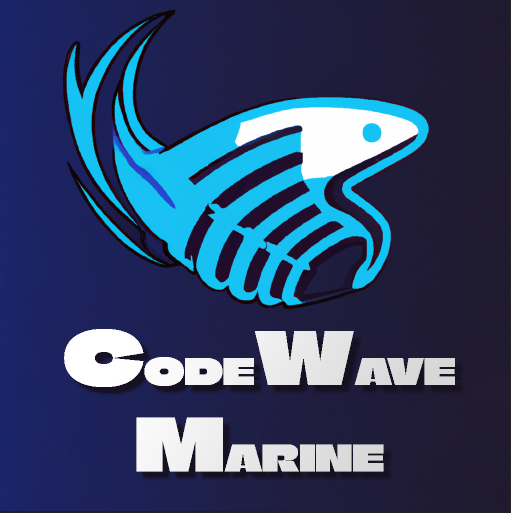